### Importação de libs e configurações iniciais

In [6]:
#libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf  ### API yahoo

In [5]:
#styles plots
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

### Importando base de dados via API Yahoo -yfinance

In [17]:
#importando base

#parametros
ticket = 'BTC-USD'
start_date = '2020-01-01'
end_date = '2024-07-31'

#carregar dados
base = yf.download(ticket,start_date,end_date)
base.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


### Análise exploratória

In [18]:
base.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1.673000e+03
mean,32808.523356,33536.825273,32035.163547,32841.392627,32841.392627,3.201261e+10
std,17851.995795,18266.729782,17383.966559,17857.089855,17857.089855,1.822464e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,19104.621094,19381.535156,18696.468750,19139.535156,19139.535156,2.022419e+10
50%,29683.380859,30195.531250,29131.578125,29682.949219,29682.949219,2.897021e+10
75%,44960.050781,46616.242188,43706.285156,44963.074219,44963.074219,3.921164e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


Text(0, 0.5, 'USD$')

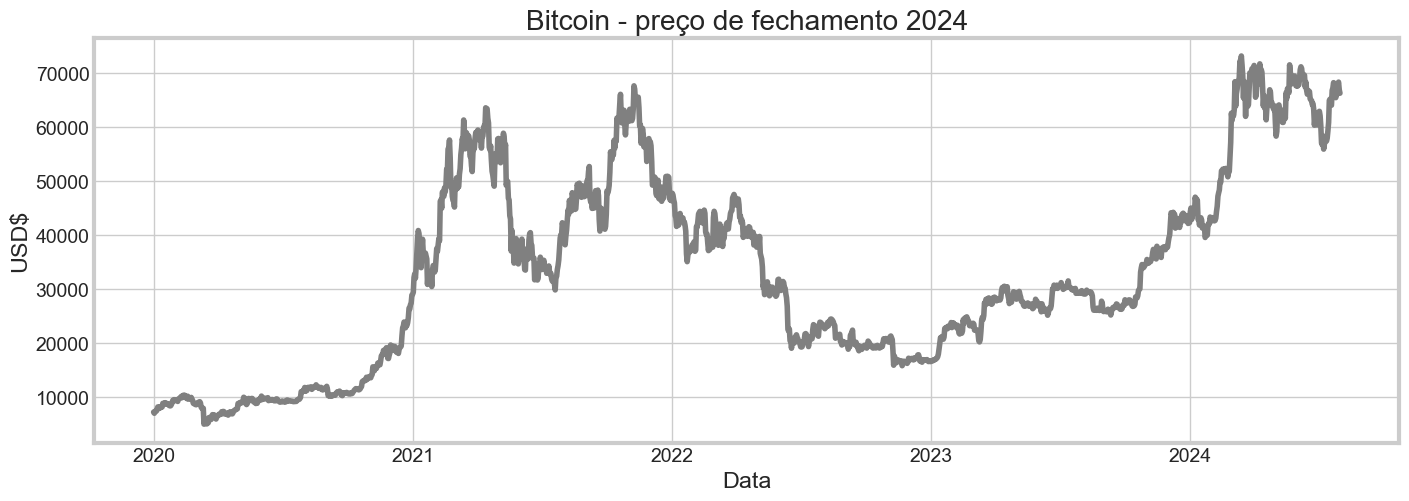

In [39]:
## Serie temporal
plt.figure(figsize=[15,5])
plt.title('Bitcoin - preço de fechamento 2024')
plt.plot(base['Close'],color='grey')
plt.xlabel('Data')
plt.ylabel('USD$')

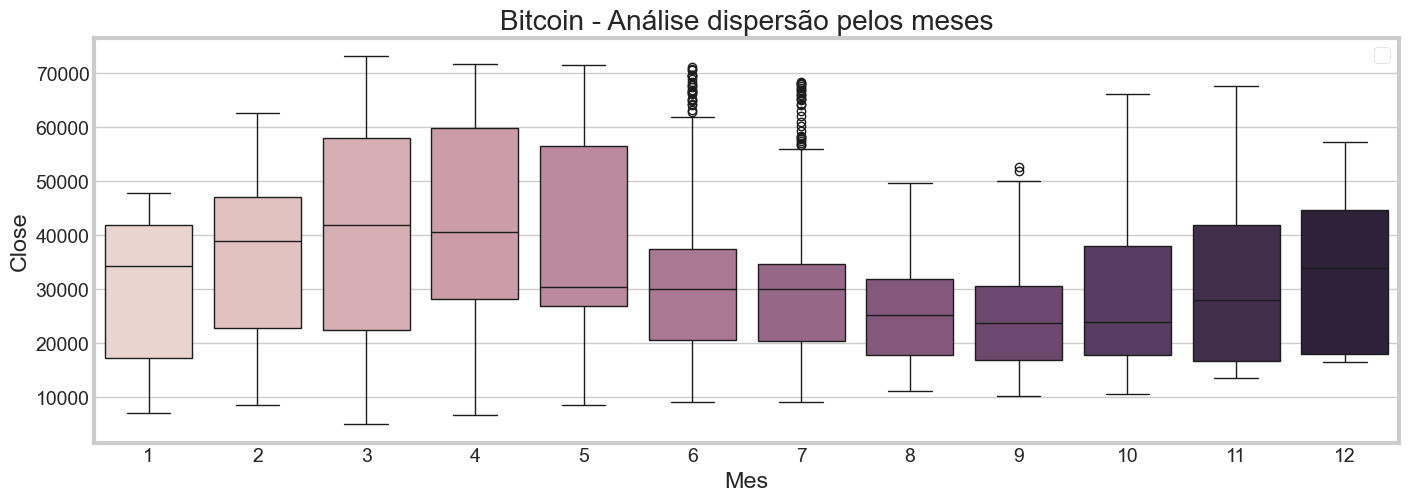

In [24]:
#adicionando coluna de mês a partir do index
base['Mes'] = base.index.month

#plotando series de bloxplots
plt.figure(figsize=[15,5])
plt.title('Bitcoin - Análise dispersão pelos meses')
sns.boxplot(base,x='Mes',y='Close' , hue= 'Mes')
plt.legend([])

Text(0, 0.5, 'USD$')

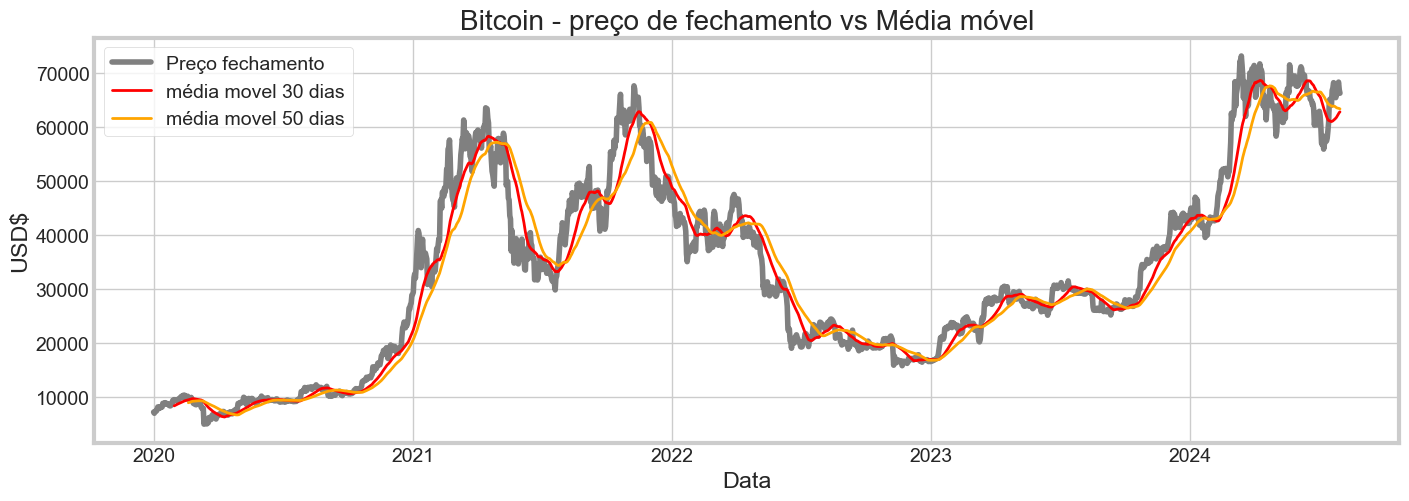

In [38]:
#plot com médias moveis
#está técnica do pandas agrupa as informações em grupos com a quantidade de janelas selecionadas, para criar separações desses dados e devinir a média móvel dessas janelas
base['Media movel 50']= base['Close'].rolling(window=50).mean()
base['Media movel 30']= base['Close'].rolling(window=30).mean()

## Serie temporal comparativa
plt.figure(figsize=[15,5])
plt.title('Bitcoin - preço de fechamento vs Média móvel')
plt.plot(base['Close'] , color = 'grey',label = 'Preço fechamento',linewidth=4)
plt.plot(base['Media movel 30'], color = 'red', label = 'média movel 30 dias' , linewidth=2)
plt.plot(base['Media movel 50'], color = 'orange', label = 'média movel 50 dias' , linewidth=2)

plt.legend(loc='upper left')

plt.xlabel('Data')
plt.ylabel('USD$')

#### Bandas de Bollinger
Análise técnica amplamente utilizada no mercado financeiro para avaliar volatilidaade dos preços de um ativo financeiro.


Em períodos de alta volatilidade as bandas se alargam e em periodo de baixa volatilidade as bandas se contraem.

- Média movel simples(SMA): Está é a linha central das bandas e representa a média dos preços de dechamento em um determinado periodo de tempo
- Banda superior: Calculada adicionando duas vezes o desvio padrão da SMA
- Banda Inferior: Calculada subtraindo duas vezes o desvio padrão da SMA

In [40]:
#bandas de bollinger para média movel 30 dias
base['devio padrao'] = base['Close'].rolling(window=30).std()
base['Banda superior'] =  base['Media movel 30'] + 2*base['devio padrao']
base['Banda inferior'] =  base['Media movel 30'] - 2*base['devio padrao']
base

,Open,High,Low,Close,Adj Close,Volume,Mes,Media movel 50,Media movel 0,Media movel 30,devio padrao,Banda superior,Banda inferior
Date,,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,1,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,1,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,1,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,1,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,65771.812500,68207.601562,65743.765625,67912.062500,67912.062500,30488630457,7,63470.886484,61957.401042,61957.401042,3911.761413,69780.923867,54133.878216
2024-07-27,67911.812500,69398.507812,66705.218750,67813.335938,67813.335938,34691905492,7,63440.301484,62164.352214,62164.352214,4054.104885,70272.561983,54056.142444
2024-07-28,67808.656250,68301.851562,67085.828125,68255.867188,68255.867188,18043166945,7,63419.303359,62428.876563,62428.876563,4186.363149,70801.602860,54056.150265


Text(0, 0.5, 'USD$')

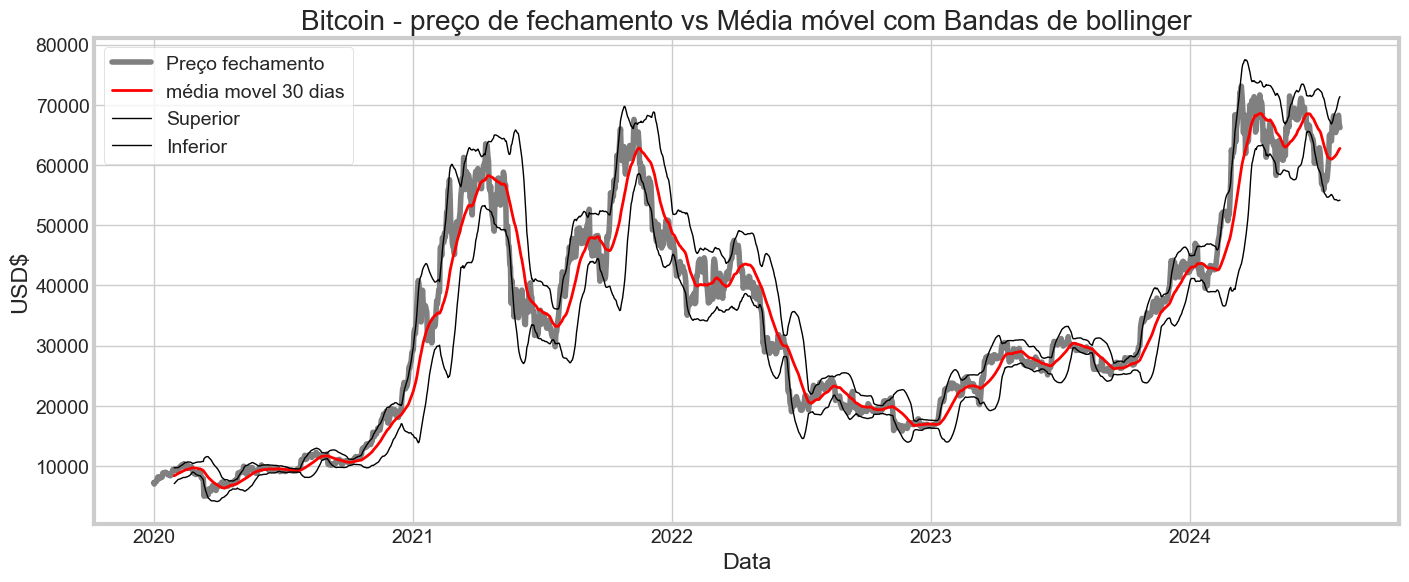

In [46]:
## Serie temporal comparativa
plt.figure(figsize=[15,6])
plt.title('Bitcoin - preço de fechamento vs Média móvel com Bandas de bollinger')
plt.plot(base['Close'] , color = 'grey',label = 'Preço fechamento',linewidth=4)
plt.plot(base['Media movel 30'], color = 'red', label = 'média movel 30 dias' , linewidth=2)
plt.plot(base['Banda superior'], color = 'black', label = 'Superior' , linewidth=1)
plt.plot(base['Banda inferior'], color = 'black', label = 'Inferior' , linewidth=1)

plt.legend(loc='upper left')

plt.xlabel('Data')
plt.ylabel('USD$')

C:\Users\walte\AppData\Local\Temp\ipykernel_21100\1457970779.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


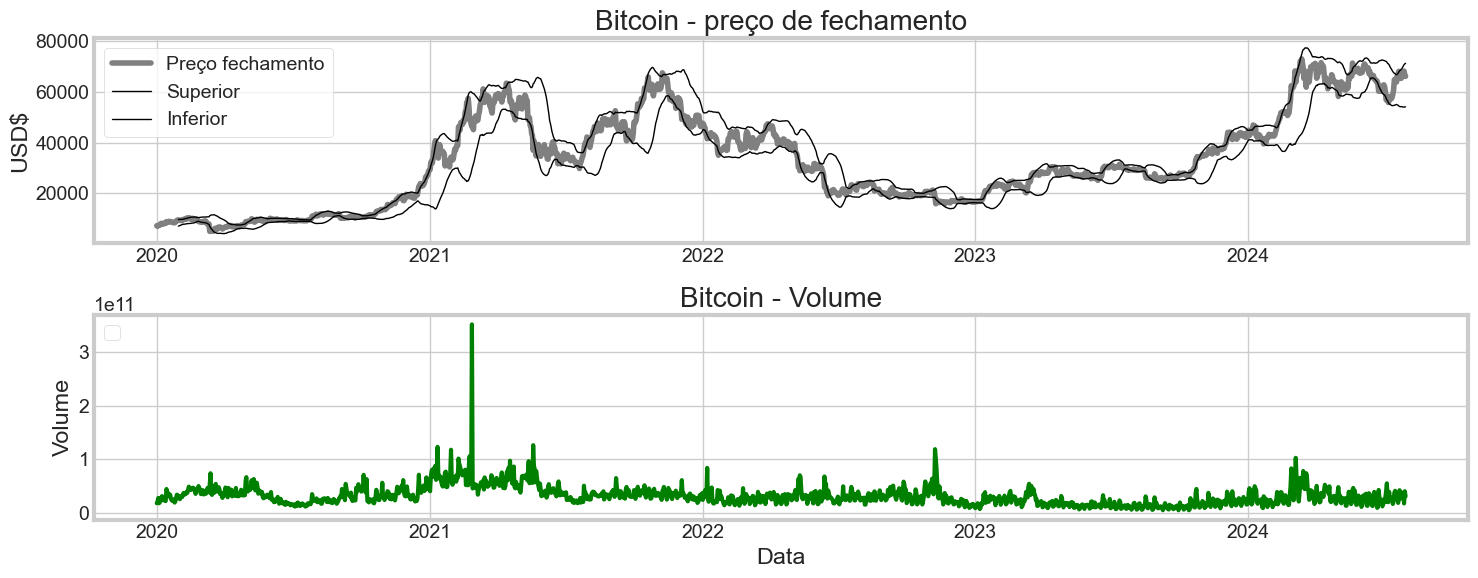

In [52]:
#Volume de negociação vs preço fechamento
plt.figure(figsize=[15,6])

#subplots

#plot1
plt.subplot(211)
plt.title('Bitcoin - preço de fechamento')
plt.plot(base['Close'] , color = 'grey',label = 'Preço fechamento',linewidth=4)
plt.plot(base['Banda superior'], color = 'black', label = 'Superior' , linewidth=1)
plt.plot(base['Banda inferior'], color = 'black', label = 'Inferior' , linewidth=1)

plt.legend(loc='upper left')
plt.ylabel('USD$')

#plot2
plt.subplot(212)
plt.title('Bitcoin - Volume')
plt.plot(base['Volume'] , color = 'green',linewidth=3)
plt.legend(loc='upper left')

plt.xlabel('Data')
plt.ylabel('Volume')

#ajusta sobreposições dos gráficos
plt.tight_layout()

Text(0, 0.5, 'Preço - USD$')

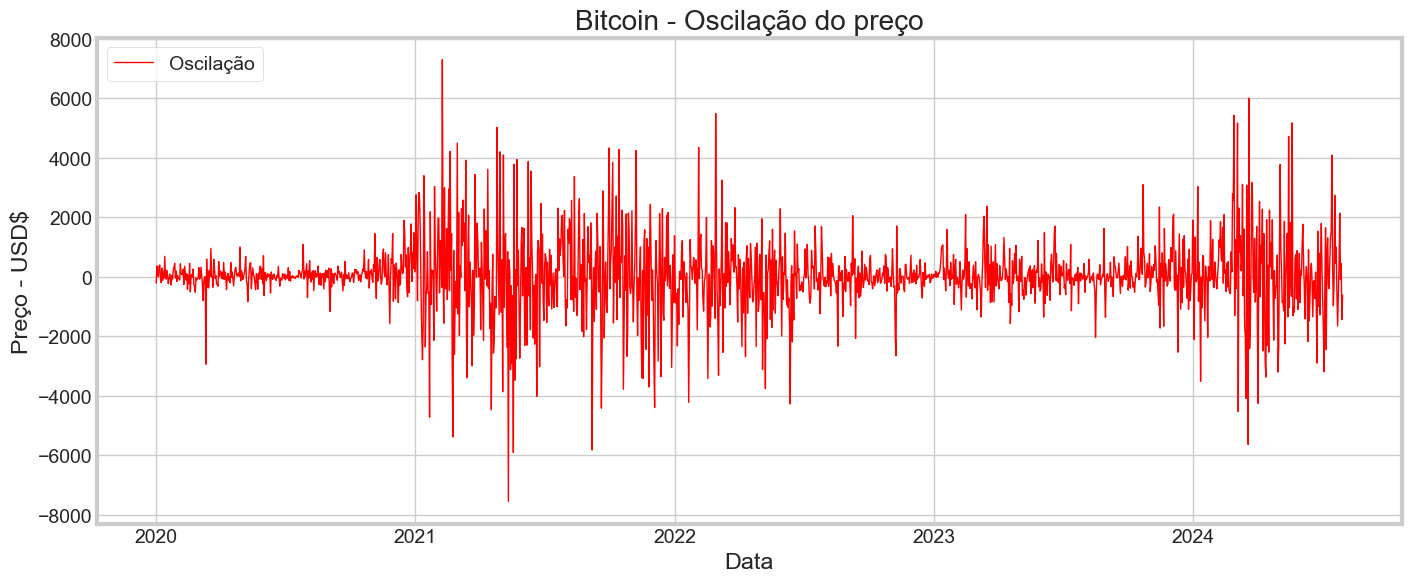

In [56]:
#oscilação

#o método shift empurra os registros para frente confore o periodo selecionado
base['Oscilacao'] =base['Close'] - base['Close'].shift(1)

## Serie temporal comparativa
plt.figure(figsize=[15,6])
plt.title('Bitcoin - Oscilação do preço')
plt.plot(base['Oscilacao'] , color = 'red',label = 'Oscilação',linewidth=1)

plt.legend(loc='upper left')

plt.xlabel('Data')
plt.ylabel('Preço - USD$')
